# Plotting Kepler
We will use Kepler maps in place of choropleth.

In [1]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

import matplotlib.pyplot as plt

import contextily as ctx
# Build the choropleth
import plotly.express as px

import pickle 

import base64
from io import BytesIO

from keplergl import KeplerGl

#!pip install ipywidgets
#!pip install keplergl
#!jupyter nbextension install --py --sys-prefix keplergl

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
ethdf=gpd.read_file("ethnicityindex_sc.geojson")
stadf=gpd.read_file("stations.geojson")

Adjusting projections

In [3]:
tod=stadf[stadf['TOD']=='Yes']
ntod=stadf[stadf['TOD']=='No']
ethdf_wb = ethdf.to_crs(epsg=3857)
stadf_wb = stadf.to_crs(epsg=3857)
tod_wb = tod.to_crs(epsg=3857)
ntod_wb = ntod.to_crs(epsg=3857)

Defining bounds for the maps

In [6]:
minx, miny, maxx, maxy = ethdf_wb.geometry.total_bounds

In [7]:
ethdf_wb.columns

Index(['GEOID_2019', 'NAME_2019', 'Total_2019', 'Non Hispanic White_2019',
       'Non Hispanic Black_2019',
       'Non Hispanic American Indian and Alaska Native_2019',
       'Non Hispanic Asian_2019',
       'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
       'Non Hispanic Some other race_2019',
       'Non Hispanic Two or more races_2019', 'Hispanic_2019', 'new_GEOID',
       'Total_2013', 'Non Hispanic White_2013', 'Non Hispanic Black_2013',
       'Non Hispanic American Indian and Alaska Native_2013',
       'Non Hispanic Asian_2013',
       'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
       'Non Hispanic Some other race_2013',
       'Non Hispanic Two or more races_2013', 'Hispanic_2013', 'GEOID_2013',
       'NAME_2013', 'Percent Total_2013', 'Percent Non Hispanic White_2013',
       'Percent Non Hispanic Black_2013',
       'Percent Non Hispanic American Indian and Alaska Native_2013',
       'Percent Non Hispanic Asian_2013',
       'Pe

Choropleth Map (for compariosn with kepler later on)

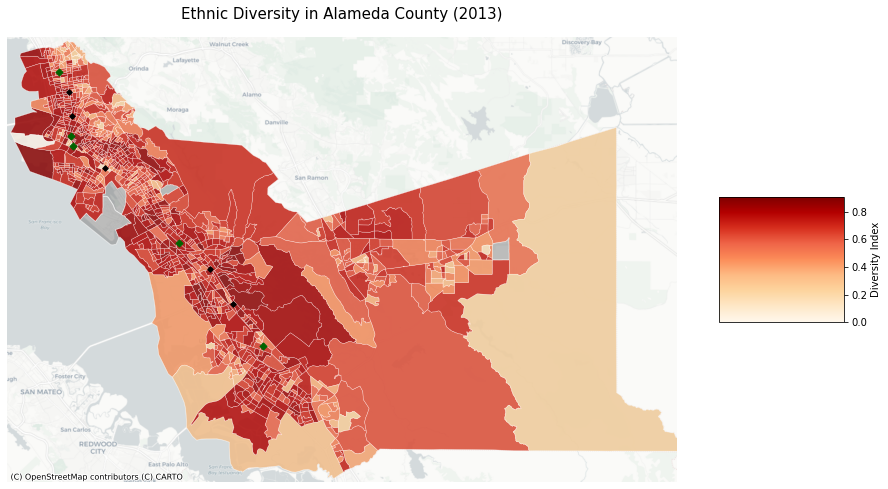

In [8]:
fig, ax = plt.subplots(figsize=(15,20))

# block groups
ethdf_wb.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

ethdf_wb.plot(ax=ax,
              column = 'iqv_2013',
              cmap='OrRd', 
              edgecolor='white',
              alpha=0.8,
            #scheme='natural',
           # classification_kwds={'bins':[0.25,0.50,0.75,1]},
              linewidth=0.3,
              legend=True,
              legend_kwds={'label':"Diversity Index",'aspect':'equal'})

tod_wb.plot(ax=ax,
         color = 'black',
         marker = "D",
         markersize = 15,
         label = ntod.Station)

ntod_wb.plot(ax=ax,
         color = 'darkgreen',
         marker = "D",
         markersize = 25,
         label = ntod.Station)

ax.set_xlim(minx-500, maxx-1000) 
ax.set_ylim(miny-500, maxy+500)
ax.axis('off')
ax.set_title("Ethnic Diversity in Alameda County (2013)",fontsize=15,pad=18)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

fig.savefig("htmls/ethnic_choropleth_2013.png", dpi=100, bbox_inches='tight')
plt.show()

In [9]:
fig.savefig("htmls/ethnic_choropleth_2013.png", dpi=100, bbox_inches='tight')
plt.show()

In [7]:
tmpfile = BytesIO()
fig.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'

with open('htmls/ethnic_choropleth_2013.html','w') as f:
    f.write(html)

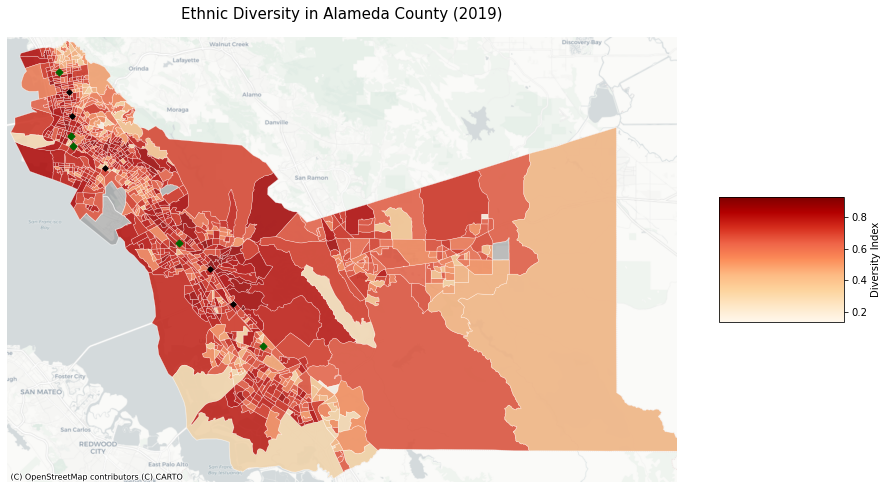

In [11]:
fig, ax = plt.subplots(figsize=(15,20))

# block groups
ethdf_wb.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

ethdf_wb.plot(ax=ax,
              column = 'iqv_2019',
              cmap='OrRd', 
              edgecolor='white',
              alpha=0.8,
              linewidth=0.3,
              legend=True,
              legend_kwds={'label':"Diversity Index",'aspect':'equal'})

tod_wb.plot(ax=ax,
         color = 'black',
         marker = "D",
         markersize = 15,
         label = ntod['Station'])

ntod_wb.plot(ax=ax,
         color = 'darkgreen',
         marker = "D",
         markersize = 25,
         label = ntod['Station'])

ax.set_xlim(minx - 500, maxx - 1000) 
ax.set_ylim(miny - 500, maxy + 500)
ax.axis('off')
ax.set_title("Ethnic Diversity in Alameda County (2019)",fontsize=15,pad=18)

# add a basemap

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

fig.savefig("htmls/ethnic_choropleth_2019.png", dpi=100, bbox_inches='tight')
plt.show()

In [9]:
tmpfile = BytesIO()
fig.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'

with open('htmls/ethnic_choropleth_2019.html','w') as f:
    f.write(html)

In [10]:
fig.savefig("htmls/ethnic_choropleth_2019.png", dpi=100, bbox_inches='tight')
plt.show()

In [11]:
ethdf_wb.columns

Index(['GEOID_2019', 'NAME_2019', 'Total_2019', 'Non Hispanic White_2019',
       'Non Hispanic Black_2019',
       'Non Hispanic American Indian and Alaska Native_2019',
       'Non Hispanic Asian_2019',
       'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
       'Non Hispanic Some other race_2019',
       'Non Hispanic Two or more races_2019', 'Hispanic_2019', 'new_GEOID',
       'Total_2013', 'Non Hispanic White_2013', 'Non Hispanic Black_2013',
       'Non Hispanic American Indian and Alaska Native_2013',
       'Non Hispanic Asian_2013',
       'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
       'Non Hispanic Some other race_2013',
       'Non Hispanic Two or more races_2013', 'Hispanic_2013', 'GEOID_2013',
       'NAME_2013', 'Percent Total_2013', 'Percent Non Hispanic White_2013',
       'Percent Non Hispanic Black_2013',
       'Percent Non Hispanic American Indian and Alaska Native_2013',
       'Percent Non Hispanic Asian_2013',
       'Pe

Creating a subset of maps with only index (lagged) and identifying details for kepler.

In [12]:
ethchange_wb=ethdf_wb[['GEOID_2019' ,'NAME_2019','iqv_2019_lag','iqv_2013_lag','geometry']]

In [13]:
ethchange_wb['index_change']=((ethchange_wb['iqv_2019_lag']-ethchange_wb['iqv_2013_lag'])/ethchange_wb['iqv_2013_lag'])*100

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [14]:
ethchange_wb.sample(10)

,GEOID_2019,NAME_2019,iqv_2019_lag,iqv_2013_lag,geometry,index_change
577,15000US060014326005,"Block Group 5, Alameda, CA",0.799657,0.789805,"MULTIPOLYGON (((-13598792.112 4539921.880, -13...",1.247353
959,15000US060014506033,"Block Group 3, Alameda, CA",0.617001,0.537450,"MULTIPOLYGON (((-13571342.173 4534820.099, -13...",14.801582
939,15000US060014502002,"Block Group 2, Alameda, CA",0.728045,0.617364,"MULTIPOLYGON (((-13571779.770 4541206.687, -13...",17.928066
650,15000US060014355003,"Block Group 3, Alameda, CA",0.771262,0.678298,"MULTIPOLYGON (((-13592002.737 4534032.283, -13...",13.705435
750,15000US060014383001,"Block Group 1, Alameda, CA",0.742368,0.806278,"MULTIPOLYGON (((-13590982.382 4527269.440, -13...",-7.926577
27,15000US060014010004,"Block Group 4, Alameda, CA",0.793102,0.771001,"MULTIPOLYGON (((-13611220.599 4555131.590, -13...",2.866449
621,15000US060014338001,"Block Group 1, Alameda, CA",0.772958,0.790813,"MULTIPOLYGON (((-13595369.817 4537955.919, -13...",-2.257817
639,15000US060014351043,"Block Group 3, Alameda, CA",0.738303,0.777620,"MULTIPOLYGON (((-13586174.382 4527248.778, -13...",-5.056126
437,15000US060014240013,"Block Group 3, Alameda, CA",0.821109,0.783367,"MULTIPOLYGON (((-13611980.912 4558345.432, -13...",4.818012
710,15000US060014371022,"Block Group 2, Alameda, CA",0.798904,0.805345,"MULTIPOLYGON (((-13592364.191 4527113.139, -13...",-0.799696


In [15]:
ethchange_wb.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7433 entries, 0 to 7432
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   GEOID_left    7433 non-null   object  
 1   NAME_left     7433 non-null   object  
 2   iqv_2019_sq   7389 non-null   float64 
 3   iqv_2013_sq   7405 non-null   float64 
 4   geometry      7433 non-null   geometry
 5   index_change  7368 non-null   float64 
dtypes: float64(3), geometry(1), object(2)
memory usage: 348.5+ KB


In [15]:
ethchange_wb=ethchange_wb.dropna()

In [12]:
ethchange_wb.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1042 entries, 0 to 1045
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   GEOID_2019    1042 non-null   object  
 1   NAME_2019     1042 non-null   object  
 2   iqv_2019      1042 non-null   float64 
 3   iqv_2013      1042 non-null   float64 
 4   geometry      1042 non-null   geometry
 5   index_change  1042 non-null   float64 
dtypes: float64(3), geometry(1), object(2)
memory usage: 57.0+ KB


Plotting the subsetted dataset on choropleth

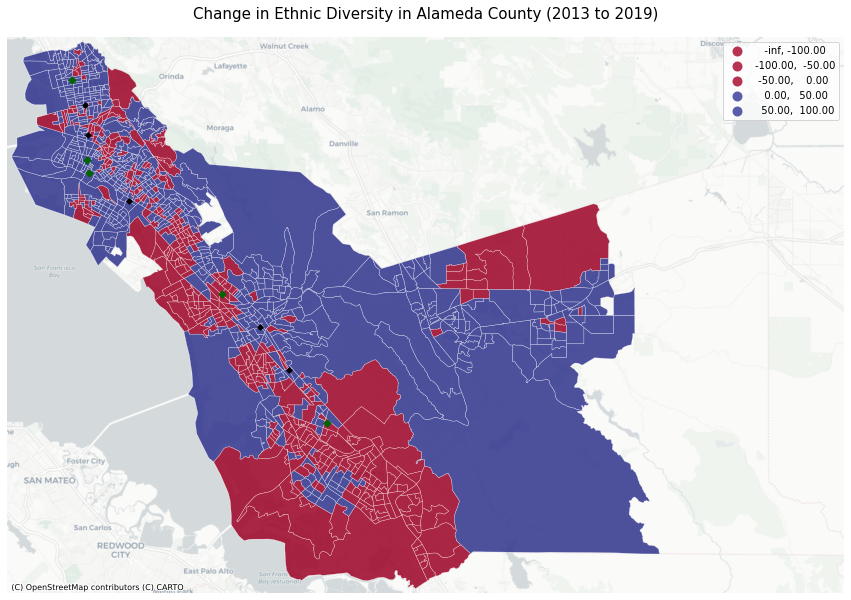

In [16]:
fig, ax = plt.subplots(figsize=(15,20))

# block groups
ethchange_wb.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

ethchange_wb.plot(ax=ax,
                  column = ethchange_wb['index_change'],
                  cmap='RdYlBu',  
                  edgecolor='white',
                  alpha=0.8,
                  linewidth=0.3,
                  scheme='user_defined',
                  classification_kwds={'bins':[-100,-50,0,50,100]},
                  legend=True,
              #legend_kwds={'label':"Diversity Index"}
                 )

tod_wb.plot(ax=ax,
         color = 'black',
         marker = "D",
         markersize = 15,
         label = ntod['Station'])

ntod_wb.plot(ax=ax,
         color = 'darkgreen',
         marker = "D",
         markersize = 25,
         label = ntod['Station'])

ax.set_xlim(minx - 500, maxx - 1000) 
ax.set_ylim(miny - 500, maxy + 500)
ax.axis('off')
ax.set_title("Change in Ethnic Diversity in Alameda County (2013 to 2019)",fontsize=15,pad=18)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [17]:
tmpfile = BytesIO()
fig.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'

with open('htmls/ethnicchange_choropleth.html','w') as f:
    f.write(html)

 Removing the index change more than 2000 for removing extreme outlier only 1 row

In [18]:
# Removing the index change more than 2000 for removing extreme outlier only 1 row

ethchange_wbw=ethchange_wb[ethchange_wb['index_change']<2000].sort_values(by='index_change')
ethchange_wbw

,GEOID_2019,NAME_2019,iqv_2019_lag,iqv_2013_lag,geometry,index_change
894,15000US060014431022,"Block Group 2, Alameda, CA",0.361300,0.468029,"MULTIPOLYGON (((-13573000.945 4509985.439, -13...",-22.803792
906,15000US060014433011,"Block Group 1, Alameda, CA",0.443866,0.556780,"MULTIPOLYGON (((-13572177.403 4505530.554, -13...",-20.279777
855,15000US060014420001,"Block Group 1, Alameda, CA",0.423724,0.521271,"MULTIPOLYGON (((-13576689.071 4518236.042, -13...",-18.713290
860,15000US060014422002,"Block Group 2, Alameda, CA",0.392770,0.471163,"MULTIPOLYGON (((-13575205.961 4514835.874, -13...",-16.638355
900,15000US060014431042,"Block Group 2, Alameda, CA",0.407714,0.483514,"MULTIPOLYGON (((-13572745.800 4513614.667, -13...",-15.676883
...,...,...,...,...,...,...
349,15000US060014211002,"Block Group 2, Alameda, CA",0.493636,0.384797,"MULTIPOLYGON (((-13611166.164 4565265.896, -13...",28.284577
947,15000US060014505012,"Block Group 2, Alameda, CA",0.701443,0.529484,"MULTIPOLYGON (((-13574965.622 4537595.723, -13...",32.476726
360,15000US060014215001,"Block Group 1, Alameda, CA",0.455144,0.341961,"MULTIPOLYGON (((-13610219.615 4564790.488, -13...",33.098284
962,15000US060014506042,"Block Group 2, Alameda, CA",0.637005,0.471988,"MULTIPOLYGON (((-13568380.407 4535197.501, -13...",34.962217


In [14]:
#ethchange_wb['iqv_2013']=ethchange_wb['iqv_2013'].replace(0,0.00000001)
#ethchange_wb['iqv_2019']=ethchange_wb['iqv_2019'].replace(0,0.00000001)
ethchange_wb.sort_values(by='iqv_2013').dropna().to_csv('ethchange_wb.csv')
ethchange_w=ethchange_wb[['GEOID_2019', 'NAME_2019', 'iqv_2019', 'iqv_2013',
       'index_change']]
ethchange_w.sort_values(by='index_change')


,GEOID_2019,NAME_2019,iqv_2019,iqv_2013,index_change
742,15000US060014382011,"Block Group 1, Alameda, CA",0.272827,0.818211,-66.655648
1005,15000US060014512022,"Block Group 2, Alameda, CA",0.172353,0.515925,-66.593466
856,15000US060014420002,"Block Group 2, Alameda, CA",0.132691,0.377477,-64.847973
762,15000US060014403013,"Block Group 3, Alameda, CA",0.312920,0.676854,-53.768399
295,15000US060014093004,"Block Group 4, Alameda, CA",0.382523,0.809077,-52.721039
...,...,...,...,...,...
177,15000US060014062021,"Block Group 1, Alameda, CA",0.668146,0.244419,173.360763
365,15000US060014216003,"Block Group 3, Alameda, CA",0.498397,0.165368,201.387100
169,15000US060014061001,"Block Group 1, Alameda, CA",0.376087,0.123096,205.523486
70,15000US060014033002,"Block Group 2, Alameda, CA",0.613111,0.126377,385.145376


## Kepler Plot of Index 2013

In [23]:
# Kepler Plot of Index 2013 

with open('./kepler/config_index_2013.pkl', 'rb') as f:
    config = pickle.load(f)
    
    
#Stations information 
stadf=gpd.read_file("stations.geojson")

stadf['lat']=stadf['geometry'].y
stadf['lon']=stadf['geometry'].x
stadf.columns

stat_gdf=stadf[['Station', 'City', 'Code', 'TOD', 'County', 'Marker', 'lat',
       'lon','geometry']]
stat_gdf['geometry'][0]

#Create a basemap 
map = KeplerGl(height=600, width=800, config=config)#show the map
map.add_data(data=ethchange_wbw, name="Change in Ethnicity Index 2013-2019")
map.add_data(data=stat_gdf, name='BART Stations')

map.save_to_html(file_name='./kepler/index_2013.html',read_only=True)
map


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to ./kepler/index_2013.html!


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'l8acwyl', 'type': …

## Kepler Plot of Index 2019

In [27]:

# Kepler Plot of Index 2019 

with open('./kepler/config_index_2019.pkl', 'rb') as f:
    config = pickle.load(f)
    
    
#Stations information 
stadf=gpd.read_file("stations.geojson")

stadf['lat']=stadf['geometry'].y
stadf['lon']=stadf['geometry'].x
stadf.columns

stat_gdf=stadf[['Station', 'City', 'Code', 'TOD', 'County', 'Marker', 'lat',
       'lon','geometry']]
stat_gdf['geometry'][0]

#Create a basemap 
map = KeplerGl(height=600, width=800, config=config)#show the map
map.add_data(data=ethchange_wbw, name="Change in Ethnicity Index 2013-2019")
map.add_data(data=stat_gdf, name='BART Stations')


map.save_to_html(file_name='./kepler/index_2019.html',read_only=True)
map



User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to ./kepler/index_2019.html!


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'l8acwyl', 'type': …

## Kepler plot of Index change between 2013 and 2019 

In [28]:


# Kepler Plot of Index change between 2013 and 2019 

with open('./kepler/config_index_change.pkl', 'rb') as f:
    config = pickle.load(f)
    
    
#Stations information 
stadf=gpd.read_file("stations.geojson")

stadf['lat']=stadf['geometry'].y
stadf['lon']=stadf['geometry'].x
stadf.columns

stat_gdf=stadf[['Station', 'City', 'Code', 'TOD', 'County', 'Marker', 'lat',
       'lon','geometry']]
stat_gdf['geometry'][0]

#Create a basemap 
map = KeplerGl(height=600, width=800, config=config)#show the map
map.add_data(data=ethchange_wbw, name="Change in Ethnicity Index 2013-2019")
map.add_data(data=stat_gdf, name='BART Stations')


map.save_to_html(file_name='./kepler/index_change.html',read_only=True)
map

#config=map.config



User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to ./kepler/index_change.html!


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'l8acwyl', 'type': …

## Configuring Kepler and saving files. 

The following three pieces of code were used to create the Configuration and save the config file as a dictionary using pickle 

In [22]:
config=map.config

with open('./kepler/config_index_2013.pkl', 'wb') as f:
    pickle.dump(config, f)

In [26]:
config=map.config

with open('./kepler/config_index_2019.pkl', 'wb') as f:
    pickle.dump(config, f)

In [19]:
config=map.config

with open('./kepler/config_index_change.pkl', 'wb') as f:
    pickle.dump(config, f)
        
